In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [3]:
df=pd.read_csv("COfit.csv")

In [8]:
#log of both sides for exp. fit
df['logmin']=np.log(df.minutes)
df['logCO']=np.log(df.CO)

In [9]:
df.head()

,minutes,CO,logmin,logCO
0,1.000000,44.4613,0.000000,3.794619
1,1.083333,42.8862,0.080043,3.758550
2,1.166667,41.5603,0.154151,3.727145
3,1.250000,40.3411,0.223144,3.697371
4,1.333333,39.3190,0.287682,3.671708


In [17]:
x=df.minutes.to_numpy()
y=df.CO.to_numpy()

In [49]:
#define fit function
def test(x, a,b,a2,b2, c):
    return a*np.exp(-b*x)+a2*np.exp(-b2*x)+c

In [50]:
param, param_cov = curve_fit(test,x,y)

In [51]:
param

array([34.61096972,  1.27897779, 22.33151121,  0.17500355, 15.60956675])

In [52]:
fit=(param[0]*np.exp(-param[1]*x)+param[2]*np.exp(-param[3]*x)+param[4])

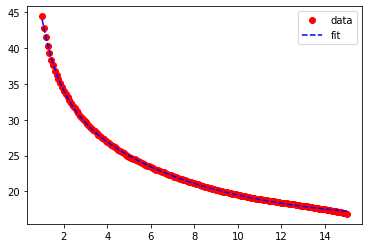

In [53]:
plt.plot(x,y,'o',color='red',label='data')
plt.plot(x,fit,'--',color='blue',label='fit')
plt.legend()
plt.show()

In [54]:
fitdf=pd.DataFrame(x,columns=["minutes"])

In [45]:
fitdf['CO']=df.CO
fitdf['fit']=fit

In [47]:
fitdf.to_csv("fit.csv")